<a href="https://colab.research.google.com/github/alirezaght/tesseract-train-font/blob/main/tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting google drive to have access to data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Create dataset

/content
/content/dataset
Copy of BBADRBD.TTF


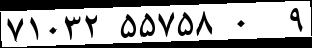

Copy of BHOMA.TTF


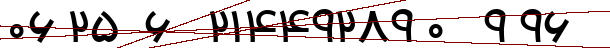

Copy of BMITRA.TTF


Copy of BMITRABD.TTF


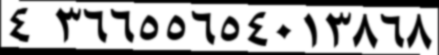

Copy of BNAZANB.TTF


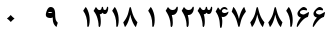

Copy of BNAZANIN.TTF


Copy of BROYA.TTF


Copy of BROYABD.TTF


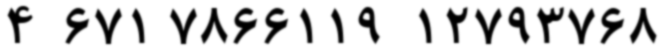

Copy of BZAR.TTF


Copy of BZARBOLD.TTF


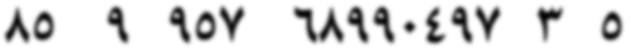

Copy of BBADR.TTF


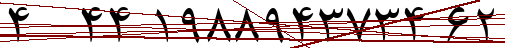

Copy of BJALAL.TTF


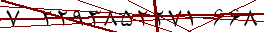

Copy of BJALALBD.TTF


Copy of BARASH.TTF


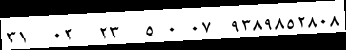

futur.ttf


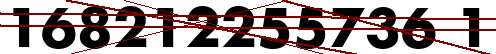

Helvetica.ttf


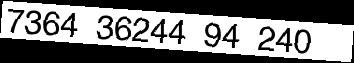

ariblk.ttf


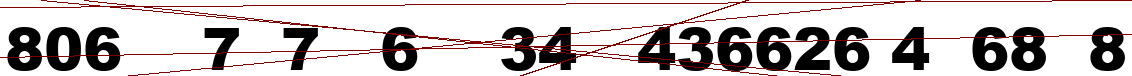

skipping cambria.ttc
calibrili.ttf


calibriz.ttf


calibrib.ttf


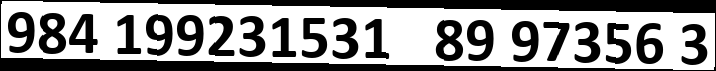

calibri.ttf


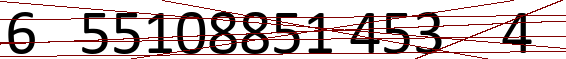

calibril.ttf


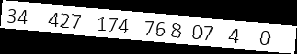

ariali.ttf


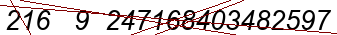

arialbd.ttf


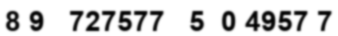

calibrii.ttf


arialbi.ttf


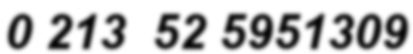

arial.ttf


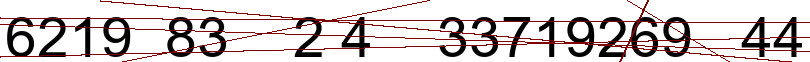

verdanaz.ttf


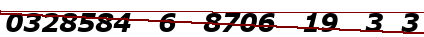

verdana.ttf


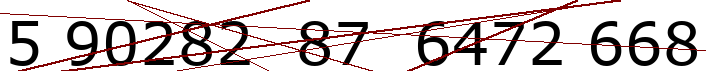

verdanab.ttf


timesbi.ttf


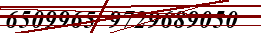

verdanai.ttf


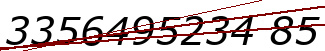

timesi.ttf


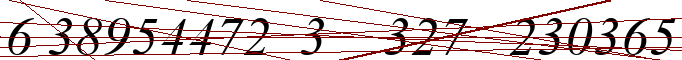

times.ttf


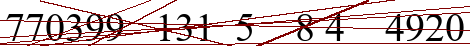

timesbd.ttf


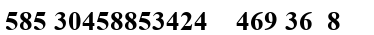

cambriai.ttf


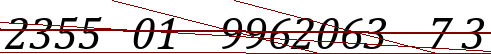

framdit.ttf


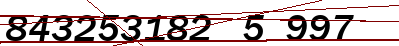

framd.ttf


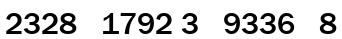

cambriaz.ttf


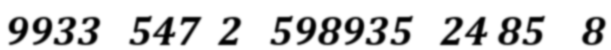

micross.ttf


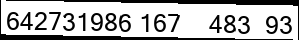

cambriab.ttf


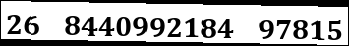

ROCKB.TTF


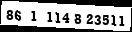

ROCCB___.TTF


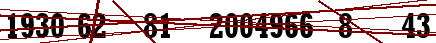

ROCK.TTF


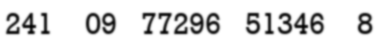

OCRAEXT.TTF


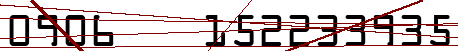

ROCKBI.TTF


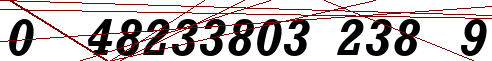

ROCKI.TTF


ROCKEB.TTF


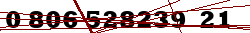

FRADMIT.TTF


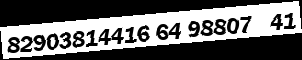

FRADMCN.TTF


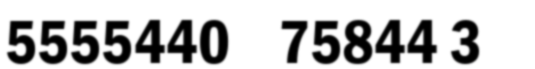

FRAHV.TTF


FRAMDCN.TTF


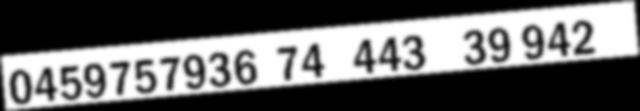

FRAHVIT.TTF


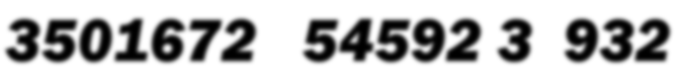

FRADM.TTF


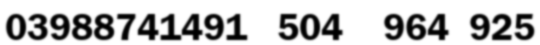

ROCC____.TTF


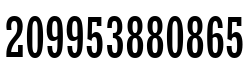

ARIALNBI.TTF


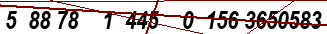

ARIALNI.TTF


ARIALNB.TTF


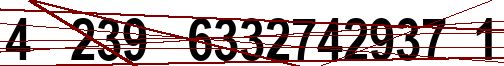

ARIALN.TTF


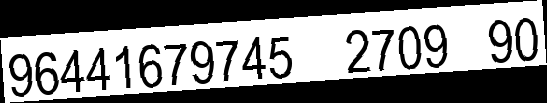

In [1]:
%cd /content
!rm -rf /content/dataset
!mkdir /content/dataset
%cd /content/dataset

from PIL import Image,ImageDraw,ImageFont,ImageFilter
from IPython.display import display
import os
import random

def create_dataset(number_for_each_font):
  FONT_DIR = '/content/drive/MyDrive/fonts'
  count = 0
  for font_file in os.listdir(f'{FONT_DIR}'):
    sample = False
    if not font_file.lower().endswith('ttf'):
      print(f'skipping {font_file}')
      continue
    for i in range(number_for_each_font):
      count += 1
      size = random.randint(12, 64)
      font = ImageFont.truetype(f"{FONT_DIR}/{font_file}", size, encoding='unic')
      length = random.randint(12, 20)
      numbers = []
      for j in range(length):
        n = str(random.randint(0, 9)) + ((" " * random.randint(0, 4)) if random.random() < 0.3 else "")
        numbers.append(n)        

      unicode_text = "".join(numbers)
      # get the line size
      text_width, text_height = font.getsize(unicode_text)
      width = text_width + 10
      height = text_height + 10
      # create a blank canvas with extra space between lines
      canvas = Image.new('RGB', (width, height), "white")
      
      # draw the text onto the text canvas, and use black as the text color
      draw = ImageDraw.Draw(canvas)
      draw.text((5,5), unicode_text, 'black', font)
      if random.random() < 0.3:
        canvas = canvas.rotate(random.randint(-5,5), expand = 1)

      if random.random() < 0.3 and size > 24:
        canvas = canvas.filter(ImageFilter.GaussianBlur(radius=random.randint(0,2)))
      # save the blank canvas to a file
      if size > 24:
        for k in range(10):
          if random.random() < 0.3:
            draw.line((random.randint(0, width),0, random.randint(0, width), height), fill=128, width=random.randint(0, 3))
        for k in range(10):
          if random.random() < 0.3:
            draw.line((0,random.randint(0, height), width, random.randint(0, height)), fill=128, width=random.randint(0, 3))

      canvas.save(f"{count}.tif", dpi=(300, 300))
      with open(f'{count}.gt.txt', 'w') as f:
        f.write(unicode_text)
      if not sample:
        sample = True
        print(font_file)
        im = Image.open(f'{count}.tif', 'r')
        display(im)

create_dataset(300)

# Install tesseract

First let's install tesseract + all the dependency required

In [2]:
!apt install tesseract-ocr libtesseract-dev bc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  bc libleptonica-dev libtesseract-dev tesseract-ocr tesseract-ocr-eng
  tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 37 not upgraded.
Need to get 7,636 kB of archives.
After this operation, 29.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 bc amd64 1.07.1-2 [86.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesser

# Clone tesstrain

In [3]:
%cd /content
!git clone https://github.com/tesseract-ocr/tesstrain

/content
Cloning into 'tesstrain'...
remote: Enumerating objects: 819, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 819 (delta 21), reused 18 (delta 9), pack-reused 775
Receiving objects: 100% (819/819), 13.37 MiB | 18.66 MiB/s, done.
Resolving deltas: 100% (463/463), done.


# Prepare data

If we want to load from google drive

In [ ]:
%cd /content
!rm -rf /content/bnk-ground-truth
!cp /content/drive/MyDrive/dataset.rar /content/
!unrar x /content/dataset.rar
!mkdir tesstrain/data
!rm -rf tesstrain/data/bnk-ground-truth
!mv bnk-ground-truth tesstrain/data/bnk-ground-truth
%cd /content/tesstrain

If we want to use the datase we just created

In [4]:
%cd /content
!mkdir tesstrain/data
!rm -rf tesstrain/data/bnk-ground-truth
!mv dataset tesstrain/data/bnk-ground-truth
%cd /content/tesstrain

/content
/content/tesstrain


# Train

In [5]:
%cd /content/tesstrain
!mkdir tessdata
%cd tessdata
!wget https://github.com/tesseract-ocr/tessdata_best/raw/main/eng.traineddata
%cd /content/tesstrain

/content/tesstrain
/content/tesstrain/tessdata
--2021-11-17 21:41:30--  https://github.com/tesseract-ocr/tessdata_best/raw/main/eng.traineddata
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/eng.traineddata [following]
--2021-11-17 21:41:30--  https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15400601 (15M) [application/octet-stream]
Saving to: ‘eng.traineddata’

eng.traineddata     100%[===================>]  14.69M  --.-KB/s    in 0.09s   

2021-11-17 21:41:31 (157 MB/s) - ‘eng.tr

In [6]:
# !make clean MODEL_NAME=bnk
!make training MODEL_NAME=bnk START_MODEL=eng TESSDATA=/content/tesstrain/tessdata

Streaming output truncated to the last 5000 lines.
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/10901.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/2493.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/98.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/4002.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/2269.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/4301.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/15774.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/1804.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/2638.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/12157.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/2882.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/16793.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/6382.lstmf
Loaded 1/1 pages (1-1) of document data/bnk-ground-truth/10507.

In [44]:
!make traineddata MODEL_NAME=bnk

mkdir data/bnk/tessdata_best
mkdir data/bnk/tessdata_fast
lstmtraining \
          --stop_training \
          --continue_from data/bnk/checkpoints/bnk2.237_1608.checkpoint \
          --traineddata data/bnk/bnk.traineddata \
          --model_output data/bnk/tessdata_best/bnk2.237_1608.traineddata
Loaded file data/bnk/checkpoints/bnk2.237_1608.checkpoint, unpacking...
lstmtraining \
          --stop_training \
          --continue_from data/bnk/checkpoints/bnk8.061_527.checkpoint \
          --traineddata data/bnk/bnk.traineddata \
          --model_output data/bnk/tessdata_best/bnk8.061_527.traineddata
Loaded file data/bnk/checkpoints/bnk8.061_527.checkpoint, unpacking...
lstmtraining \
          --stop_training \
          --continue_from data/bnk/checkpoints/bnk2.675_1411.checkpoint \
          --traineddata data/bnk/bnk.traineddata \
          --model_output data/bnk/tessdata_best/bnk2.675_1411.traineddata
Loaded file data/bnk/checkpoints/bnk2.675_1411.checkpoint, unpacking...
lst